<a href="https://colab.research.google.com/github/rafflds/Preco-abacate/blob/main/Explora%C3%A7%C3%A3o_e_previs%C3%A3o_de_pre%C3%A7os_de_abacate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração e previsão de preços de abacate
<FONT COLOR=RED>Dados do abacate atualizados até 3 de dezembro de 2023

### Sobre o conjunto de dados
Os dados fornecidos aqui foram coletados do Hass Avocado Board - Dados de categoria.

Esta é uma versão atualizada do conjunto de dados já apresentado ao Kaggle.

Aqui está o link para o primeiro conjunto de dados enviado por Justin Kiggins . E outra de Valentin Joseph , uma atualização agregando dados até 2021.


**Nota sobre as regiões mencionadas no conjunto de dados**

"região" inclui regiões e locais-chave que são cidades ou sub-regiões. Os valores para locais não somam os das regiões. A seguir estão as regiões, conforme descrito aqui (outra descrição do conjunto de dados)


Califórnia,
Oeste,
Planícies,
Central sul,
Sudeste,
Centro-sul,
Grandes Lagos,
Nordeste.



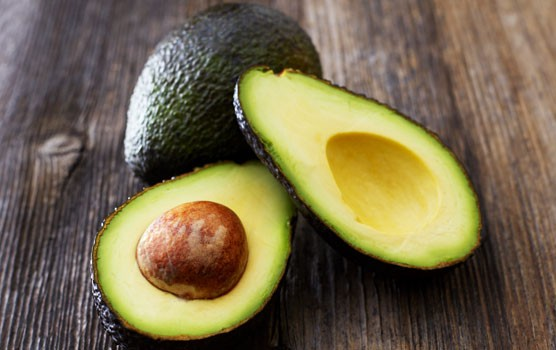

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [ ]:
# Visualizar as 5 primeiras linhas da base de dados
df = pd.read_csv('ABACATE.csv')
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [ ]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42260 entries, 0 to 42259
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          42260 non-null  object 
 1   AveragePrice  42260 non-null  float64
 2   TotalVolume   42260 non-null  float64
 3   plu4046       42260 non-null  float64
 4   plu4225       42260 non-null  float64
 5   plu4770       42260 non-null  float64
 6   TotalBags     42260 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          42259 non-null  object 
 11  region        42259 non-null  object 
dtypes: float64(9), object(3)
memory usage: 3.9+ MB


In [ ]:
# Somar a quantidade de valores nulos que existe no dataset
df.isnull().sum()

Date               0
AveragePrice       0
TotalVolume        0
plu4046            0
plu4225            0
plu4770            0
TotalBags          0
SmallBags       1235
LargeBags       1235
XLargeBags      1235
type               1
region             1
dtype: int64

In [ ]:
# Verificar os valores duplicados
duplicados = df.duplicated().sum()
print(f'Numer de linhas duplicadas: {duplicados}')

Numer de linhas duplicadas: 0


In [ ]:
# Visualizar métricas estatísticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,42260.0,1.423905,3.931559e-01,0.44,1.114627,1.39424,1.6900,3.25
TotalVolume,42260.0,864486.845266,3.533081e+06,84.56,15060.240000,117940.04000,446853.7525,61034457.10
plu4046,42260.0,278530.125270,1.218846e+06,0.00,625.272500,11048.65500,115795.6625,22743616.17
plu4225,42260.0,233352.323800,9.986493e+05,0.00,2055.702500,18141.53500,98471.6250,20470572.61
plu4770,42260.0,18624.768994,9.030827e+04,0.00,0.000000,117.43000,3820.0575,2546439.11
TotalBags,42260.0,211771.077252,8.548478e+05,0.00,7250.107500,35323.49500,105903.2675,16298296.29
SmallBags,41025.0,103922.170677,5.692608e+05,0.00,0.000000,694.58000,37952.9800,12567155.58
LargeBags,41025.0,23313.164066,1.496622e+05,0.00,0.000000,0.00000,2814.9200,4324231.19
XLargeBags,41025.0,2731.811796,2.258910e+04,0.00,0.000000,0.00000,0.0000,679586.80


In [ ]:
# Identifique valores discrepantes com base no IQR na coluna 'AveragePrice'
Q1 = df['AveragePrice'].quantile(0.25)
Q3 = df['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = (df['AveragePrice'] < limite_inferior) | (df['AveragePrice'] > limite_superior)

print(f'Numero de outliers em Preço médio: {outliers.sum()}')

Numero de outliers em Preço médio: 248


## Limpeza e pré-processamento de dados

In [ ]:
# Remover as linhas com outliers
df = df[~outliers]

In [ ]:
# Identificar linhas com valores ausentes
linhas_ausentes = df[df[['SmallBags', 'LargeBags', 'XLargeBags']].isnull().any(axis=1)]

# Iterar sobre linhas faltantes
for index, row in linhas_ausentes.iterrows():

  # Gere porcentagens aleatórias que somam 1
  random = np.random.dirichlet(np.ones(3), size=1)[0]

  # Calcula o valor restante necessário para que a soma seja igual ao TotalBag
  remaining_value = row['TotalBags'] - row[['SmallBags', 'LargeBags', 'XLargeBags']].sum()

  # Preencha os valores ausentes com porcentagens aleatórias
  df.at[index, 'SmallBags'] = remaining_value * random[0]
  df.at[index, 'LargeBags'] = remaining_value * random[1]
  df.at[index, 'XLargeBags'] = remaining_value * random[2]

# Verify that there are no more missing values
print(df[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']].isnull().sum())

TotalBags     0
SmallBags     0
LargeBags     0
XLargeBags    0
dtype: int64


In [ ]:
# Mudar o tipo das colunas selecionadas (Object | Int)
df[['plu4046', 'plu4225', 'plu4770']] = df[['plu4046', 'plu4225', 'plu4770']].astype(str)
df[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']] = df[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']].astype(int)

## Análise Exploratória de Dados

<ipython-input-11-23892011e420>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=plu_codes, y=unique_counts, palette='viridis')


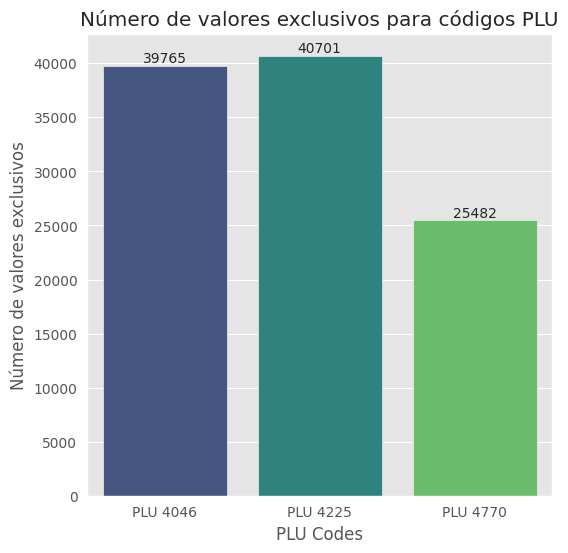

In [ ]:
# Número de valores únicos para cada código PLU
unique_counts = [df['plu4046'].nunique(), df['plu4225'].nunique(), df['plu4770'].nunique()]
plu_codes = ['PLU 4046', 'PLU 4225', 'PLU 4770']

# Bar plot
plt.figure(figsize=(6, 6))
barplot = sns.barplot(x=plu_codes, y=unique_counts, palette='viridis')
plt.title('Número de valores exclusivos para códigos PLU')
plt.xlabel('PLU Codes')
plt.ylabel('Número de valores exclusivos')

# Adicione valores de dados no topo das barras
for i, count in enumerate(unique_counts):
    barplot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

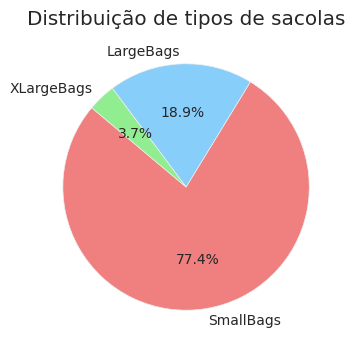

In [ ]:
# Calcula a soma de cada tipo de sacola em todas as linhas
total_small_bags = df['SmallBags'].sum()
total_large_bags = df['LargeBags'].sum()
total_xlarge_bags = df['XLargeBags'].sum()

# Cria dados para o gráfico de pizza
sizes = [total_small_bags, total_large_bags, total_xlarge_bags]
labels = ['SmallBags', 'LargeBags', 'XLargeBags']
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de tipos de sacolas')
plt.show()

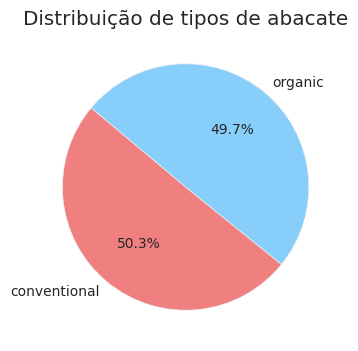

In [ ]:
# Calcula a distribuição do 'tipo'
type_distribution = df['type'].value_counts()

# Cria dados para o gráfico de pizza
sizes = type_distribution.values
labels = type_distribution.index
colors = ['lightcoral', 'lightskyblue']

# Plot o gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de tipos de abacate')
plt.show()

In [ ]:
# Agrupe por 'região' e calcule a média de 'AveragePrice' para cada região
avg_price_by_region = df.groupby('region')['AveragePrice'].mean()
sorted_avg_price_by_region = avg_price_by_region.sort_values(ascending=False)
top_regions = sorted_avg_price_by_region.head(10)


# Crie um gráfico de barras horizontais interativo usando Plotly
fig = px.bar(x=top_regions.values, y=top_regions.index, orientation='h', color=top_regions.values,
             labels={'x': 'Preço médio', 'y': 'Região'}, title='Principais regiões por preço médio',
             color_continuous_scale='Plasma')
fig.show()

In [ ]:
# Agrupe por 'região' e calcule a média 'TotalVolume' para cada região
avg_volume_by_region = df.groupby('region')['TotalVolume'].mean()
sorted_avg_volume_by_region = avg_volume_by_region.sort_values(ascending=False)
top_regions_volume = sorted_avg_volume_by_region.head(10)

# Crie um gráfico de barras horizontais interativo usando Plotly
fig = px.bar(x=top_regions_volume.values, y=top_regions_volume.index, orientation='h', color=top_regions_volume.values,
             labels={'x': 'Volume total médio', 'y': 'Região'}, title='Principais regiões por volume total médio',
             color_continuous_scale='Jet')

fig.show()

<ipython-input-17-7b51249a72c5>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




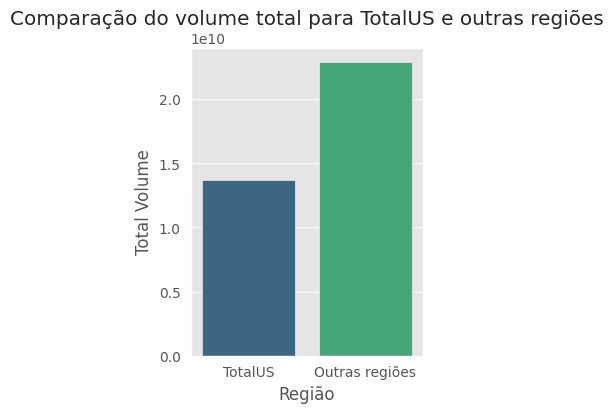

In [ ]:
# Filter data for 'TotalUS' region
total_us_data = df[df['region'] == 'TotalUS']

# Filter data for other regions
other_regions_data = df[df['region'] != 'TotalUS']

# Calculate the sum of 'TotalVolume' for 'TotalUS' region
total_us_volume = total_us_data['TotalVolume'].sum()

# Calculate the sum of 'TotalVolume' for other regions
other_regions_volume = other_regions_data.groupby('region')['TotalVolume'].sum().sum()

# Create a bar plot to compare 'TotalVolume' for 'TotalUS' and others
plt.figure(figsize=(3, 4))
sns.barplot(x=['TotalUS', 'Outras regiões'], y=[total_us_volume, other_regions_volume], palette='viridis')
plt.xlabel('Região')
plt.ylabel('Total Volume')
plt.title('Comparação do volume total para TotalUS e outras regiões')
plt.show()

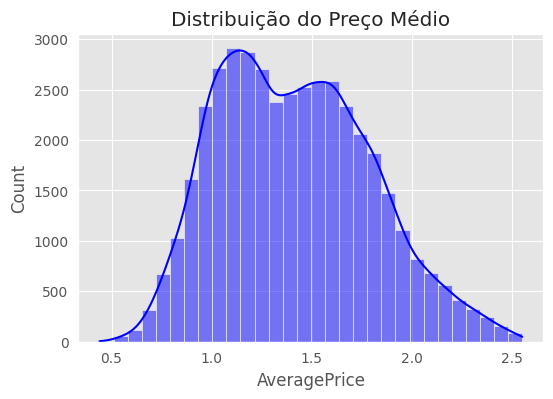

In [ ]:
# Visualizar a distribuição de AveragePrice
plt.figure(figsize=(6, 4))
sns.histplot(df['AveragePrice'], bins=30, kde=True, color='blue')
plt.title('Distribuição do Preço Médio')
plt.show()

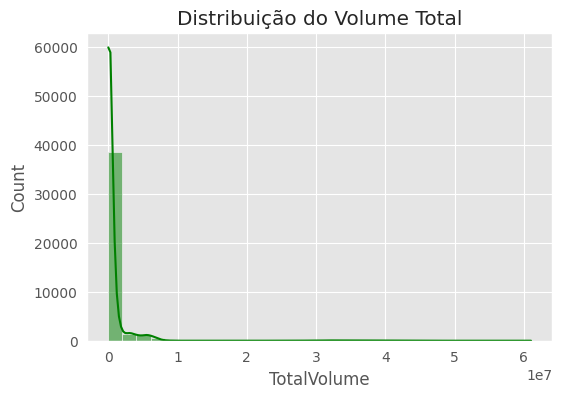

In [ ]:
# Visualize a distribuição do TotalVolume
plt.figure(figsize=(6, 4))
sns.histplot(df['TotalVolume'], bins=30, kde=True, color='green')
plt.title('Distribuição do Volume Total')
plt.show()

In [ ]:
# Converter a coluna 'Data' para o formato data e hora
df['Date'] = pd.to_datetime(df['Date'])

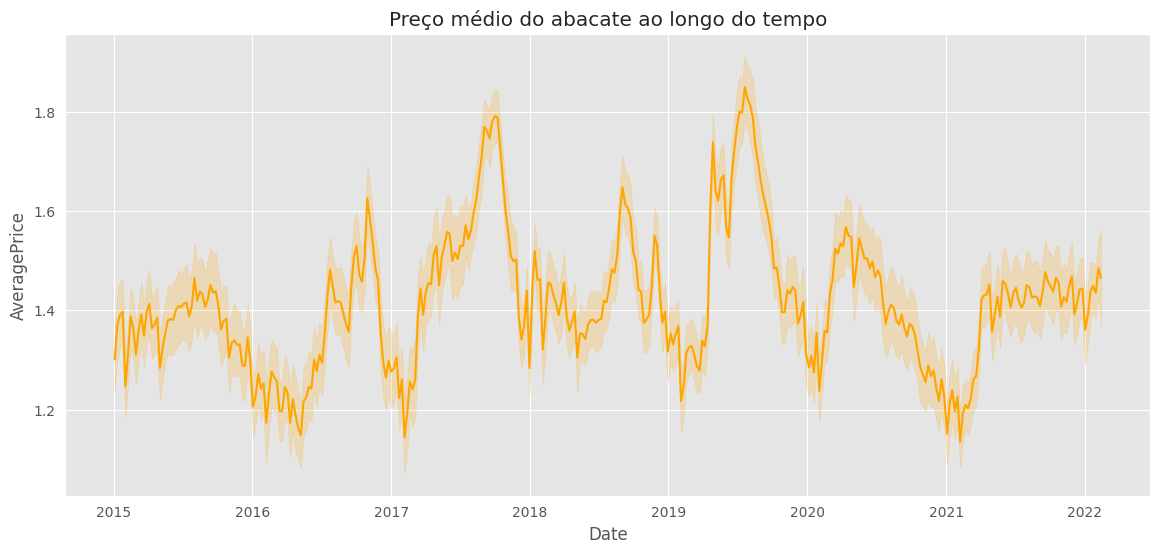

In [ ]:
# Plot o preço médio ao longo do tempo
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='AveragePrice', data=df, color='orange')
plt.title('Preço médio do abacate ao longo do tempo')
plt.show()

In [ ]:
# Preço médio do gráfico interativo ao longo do tempo
fig = px.line(df, x='Date', y='AveragePrice', title='Preço médio do abacate ao longo do tempo', markers=True)
fig.update_layout(xaxis_title='Data', yaxis_title='Preço médio')
fig.show()

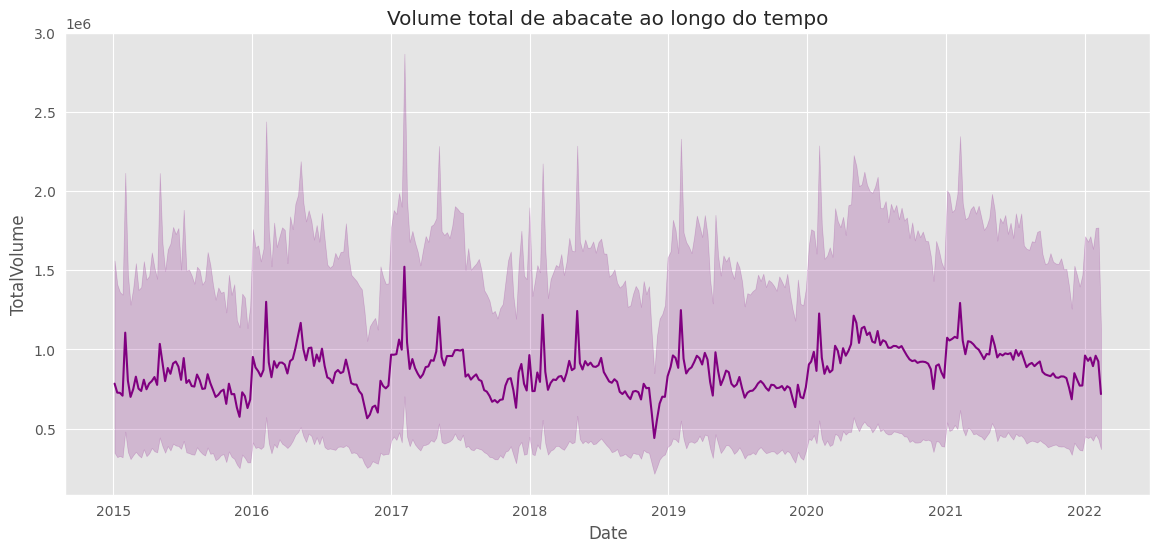

In [ ]:
# Plot Volume total de abacate ao longo do tempo
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='TotalVolume', data=df, color='purple')
plt.title('Volume total de abacate ao longo do tempo')
plt.show()

In [ ]:
# Definir bordas de compartimento personalizadas
custom_bin_edges = [0, 50000, 100000, 150000, np.inf]

# Cria compartimentos para 'TotalVolume'
df['VolumeCategory'] = pd.cut(df['TotalVolume'], bins=custom_bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])

# Cria caixas para 'TotalBags'
df['BagsCategory'] = pd.cut(df['TotalBags'], bins=custom_bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])

# Veja o início dos dados após o pré-processamento
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,VolumeCategory,BagsCategory
0,2015-01-04,1.22,40873.28,2819.5,28287.42,49.9,9716,9186,529,0,conventional,Albany,Low,Low
1,2015-01-04,1.79,1373.95,57.42,153.88,0.0,1162,1162,0,0,organic,Albany,Low,Low
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815,16707,30108,0,conventional,Atlanta,Very High,Low
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.0,1408,1071,336,0,organic,Atlanta,Low,Low
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136,137146,3990,0,conventional,BaltimoreWashington,Very High,High


## Machine Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Crie uma cópia do DataFrame
X = df[['Date', 'type', 'region', 'VolumeCategory', 'BagsCategory']].copy()
y = df['AveragePrice']

# Extraia ano, mês e dia
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

# Elimine a coluna 'Data' original
X = X.drop('Date', axis=1)

# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Aplicar label encoding colunas categoricas
X['type'] = label_encoder.fit_transform(X['type'])
X['region'] = label_encoder.fit_transform(X['region'])
X['VolumeCategory'] = label_encoder.fit_transform(X['VolumeCategory'])
X['BagsCategory'] = label_encoder.fit_transform(X['BagsCategory'])

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialize e treine o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Faça previsões no conjunto de testes
predictions = model.predict(X_test)

# Avalie o modelo
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.21805464645008643


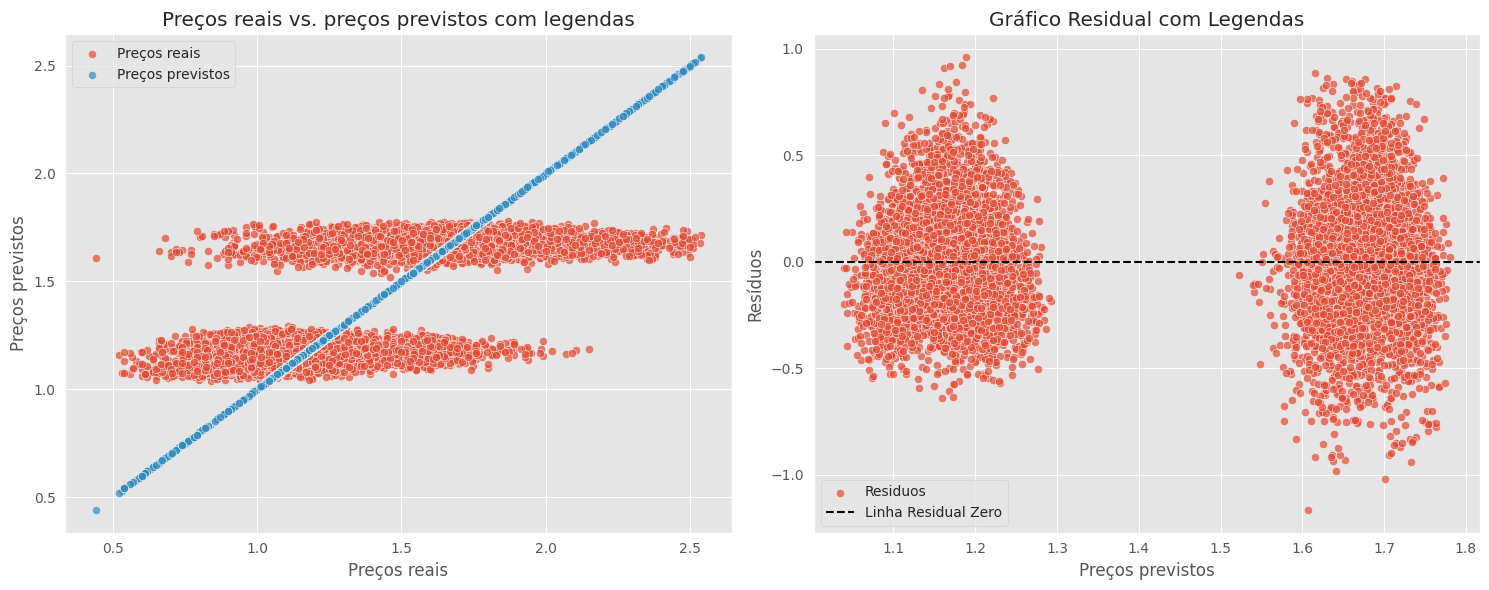

In [ ]:
# Crie subparcelas com 1 linha e 2 colunas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico de dispersão de preços reais versus preços previstos com legendas
sns.scatterplot(x=y_test, y=predictions, label='Preços reais', alpha=0.7, ax=axes[0])
sns.scatterplot(x=y_test, y=y_test, label='Preços previstos', alpha=0.7, ax=axes[0])
axes[0].set_title('Preços reais vs. preços previstos com legendas')
axes[0].set_xlabel('Preços reais')
axes[0].set_ylabel('Preços previstos')
axes[0].legend()

# Gráfico residual com legendas
residuals = y_test - predictions

sns.scatterplot(x=predictions, y=residuals, label='Residuos', alpha=0.7, ax=axes[1])
axes[1].axhline(y=0, color='black', linestyle='--', label='Linha Residual Zero')

axes[1].set_title('Gráfico Residual com Legendas')
axes[1].set_xlabel('Preços previstos')
axes[1].set_ylabel('Resíduos')
axes[1].legend()

plt.tight_layout()
plt.show()

## Salvar o modelo

In [ ]:
import joblib

# Salvar o modelo treinado
joblib.dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']